# QC report: HILICpos Rafi only samples (R5pos, R5neg & Naive)
- Minghao Gong; 07/27/2022
- This notebook specifically fits Asari run
- run with deduplicated samples (technical removed)

# Load libraries

In [1]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [2]:
#load libraries 
shhh <- suppressPackageStartupMessages # It's a library, so shhh!
shhh(library(FactoMineR))
shhh(library(factoextra))
shhh(library(reshape2))
shhh(library(tidyverse))
shhh(library(RColorBrewer))
shhh(library(gridExtra))
shhh(library(pheatmap))
library(repr)#jupyter notebook R ; image manipulation 
#shhh(library(devtools))
#install_github("vqv/ggbiplot")
shhh(library(ggbiplot))
options(warn=-1)#dont show warnings in Output 
options(digits = 14) # Or any higher number; fixing decimal places

library("rjson")

source('./utilis/utlis_MQC.R')

# Read tables

## load Metadata & feature table
- Here first use the peak Area table

# !!! What meta/feature/filtered tables in use?
- HILICpos

In [3]:
meta_path <- "../../../seq/RPneg_addgrp.csv"
featab_path <- "../../output/preproc_fultab_wt_stemCell67/log2_hMinImp_TICn_groupFil0.3_RPneg_blkM_featab.csv"

#### Read metadata table

In [4]:
# metadata information
meta_df <- read.csv(meta_path)

In [5]:
head(meta_df)

Sample.Type File.Name                Sample.ID              Sample_ID_upd
1 Blank       Blank_20230308_002       Blank_20230308_002     Blank_1      
2 Blank       Blank_20230308_004       Blank_20230308_004     Blank_2      
3 Blank       Blank_std_20230308_1_002 Blank_std_20230308_002 Blank_std_1  
4 QC          MT_20230308_002          Qstd_20230308_002      Qstd_1       
5 QC          MT_20230308_004          Qstd_20230308_004      Qstd_2       
6 Unknown     MT_20230308_006          pooledsample_02        pooled_1     
  cell_number group     Comment
1 NR          Blank     1      
2 NR          Blank     1      
3 NR          Blank_std 1      
4 NR          Qstd      1      
5 NR          Qstd      1      
6 NA          pooled    1      
  Path                                                                                          
1 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
2 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
3 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
4 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
5 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
6 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
  Instrument.Method                                                                                   
1 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
2 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
3 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
4 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
5 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
6 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
  Process.Method Position Inj.Vol
1 NA             G:A1     2      
2 NA             G:A1     2      
3 NA             G:A2     2      
4 NA             G:A3     2      
5 NA             G:A3     2      
6 NA             G:A4     5

#### Read in the feature table
- Of note, since it is using tibble, row.names are suppressed; `COMP ID` comes as the first columns

In [6]:
asari_df <- read.csv(featab_path,row.names = 1)

In [7]:
asari2data_feat_df_regExpr <- function(asari_df,regExpr_sample_cols) {
    sample_col_index = grep(regExpr_sample_cols,colnames(asari_df))
    featab_df = asari_df[,c(1,sample_col_index)]
    return(featab_df)
}

asari2data_feat_df_index <- function(asari_df,end_index = 11) {
    featab_df = asari_df[,c(1,end_index:ncol(asari_df))]
    return(featab_df)
}

In [8]:
head(asari_df)

CD8TD_750K_1    CD8TD_750K_2    CD8stem_250K_1  CD8stem_300K_2 
F3  21.904491712540 21.398396984687 21.842865177564 21.242466893216
F5  17.662567551330 17.662567551330 18.491319607814 17.662567551330
F6  17.152096648974 17.152096648974 18.467191505933 18.275189227328
F7  17.220312192579 17.220312192579 18.500977102325 18.453155999216
F9  19.870577691882 19.870577691882 21.531643802742 21.523492581682
F10 16.943642315331 18.465544086369 18.110098043111 18.120564283078
    CD8trans_250K_2 CD8trans_350K_1 Tn_250K_1       Tn_250K_2      
F3  20.655452239903 21.893674896644 20.021324507287 19.868821000962
F5  20.824522644576 17.662567551330 20.451255362274 19.977603295891
F6  17.152096648974 18.453165042902 18.381713656805 17.152096648974
F7  17.220312192579 18.378371984379 18.476223074073 17.220312192579
F9  21.479730184498 21.446149138885 21.316161665272 21.574689500253
F10 18.061499726288 18.347425908745 16.943642315331 18.070375085384
    pooled_1        pooled_2        pooled_3       
F3  21.571571428310 21.588522045043 21.576546584153
F5  17.662567551330 17.662567551330 17.662567551330
F6  17.152096648974 17.152096648974 17.152096648974
F7  17.220312192579 17.220312192579 17.220312192579
F9  21.189208416020 20.870577691882 20.960641841991
F10 17.980115630563 18.118657241262 18.217116124649

In [9]:
featab_df = asari2data_feat_df_regExpr(asari_df,"CD8TD|CD8stem\\_[0-9]|Tn\\_[0-9]|CD8trans\\_[0-9]|pooled")

In [10]:
dim(featab_df)

[1] 8862   12

In [11]:
head(featab_df) # examine the table

CD8TD_750K_1    CD8TD_750K_1.1  CD8TD_750K_2    CD8stem_250K_1 
F3  21.904491712540 21.904491712540 21.398396984687 21.842865177564
F5  17.662567551330 17.662567551330 17.662567551330 18.491319607814
F6  17.152096648974 17.152096648974 17.152096648974 18.467191505933
F7  17.220312192579 17.220312192579 17.220312192579 18.500977102325
F9  19.870577691882 19.870577691882 19.870577691882 21.531643802742
F10 16.943642315331 16.943642315331 18.465544086369 18.110098043111
    CD8stem_300K_2  CD8trans_250K_2 CD8trans_350K_1 Tn_250K_1      
F3  21.242466893216 20.655452239903 21.893674896644 20.021324507287
F5  17.662567551330 20.824522644576 17.662567551330 20.451255362274
F6  18.275189227328 17.152096648974 18.453165042902 18.381713656805
F7  18.453155999216 17.220312192579 18.378371984379 18.476223074073
F9  21.523492581682 21.479730184498 21.446149138885 21.316161665272
F10 18.120564283078 18.061499726288 18.347425908745 16.943642315331
    Tn_250K_2       pooled_1        pooled_2        pooled_3       
F3  19.868821000962 21.571571428310 21.588522045043 21.576546584153
F5  19.977603295891 17.662567551330 17.662567551330 17.662567551330
F6  17.152096648974 17.152096648974 17.152096648974 17.152096648974
F7  17.220312192579 17.220312192579 17.220312192579 17.220312192579
F9  21.574689500253 21.189208416020 20.870577691882 20.960641841991
F10 18.070375085384 17.980115630563 18.118657241262 18.217116124649

### subset metadatabased on feature table
- make sure the below list is matchable at least subsets

In [12]:
colnames(featab_df)

[1] "CD8TD_750K_1"    "CD8TD_750K_1.1"  "CD8TD_750K_2"    "CD8stem_250K_1" 
 [5] "CD8stem_300K_2"  "CD8trans_250K_2" "CD8trans_350K_1" "Tn_250K_1"      
 [9] "Tn_250K_2"       "pooled_1"        "pooled_2"        "pooled_3"

In [13]:
pull(meta_df['Sample_ID_upd']) # tibble column needs to pull out into vector

[1] "Blank_1"         "Blank_2"         "Blank_std_1"     "Qstd_1"         
 [5] "Qstd_2"          "pooled_1"        "Tn_250K_1"       "Tn_250K_2"      
 [9] "Tn_750K_3"       "Tn_750K_4"       "CD8stem_250K_1"  "CD8stem_300K_2" 
[13] "pooled_2"        "CD8trans_350K_1" "CD8trans_250K_2" "CD8TD_750K_1"   
[17] "CD8TD_750K_2"    "pooled_3"        "Qstd_3"          "Blank_3"

In [14]:
meta_df = meta_df[pull(meta_df['Sample_ID_upd']) %in% colnames(featab_df),]

In [15]:
dim(meta_df)

[1] 11 12

In [16]:
head(meta_df)

Sample.Type File.Name       Sample.ID            Sample_ID_upd  cell_number
6  Unknown     MT_20230308_006 pooledsample_02      pooled_1       NA         
7  Unknown     MT_20230308_008 Naive_250k_01_02     Tn_250K_1      250000     
8  Unknown     MT_20230308_010 Naive_250k_02_02     Tn_250K_2      250000     
11 Unknown     MT_20230308_016 CD8T_stem_250k_01_02 CD8stem_250K_1 250000     
12 Unknown     MT_20230308_018 CD8T_stem_300k_01_02 CD8stem_300K_2 300000     
13 Unknown     MT_20230308_020 pooledsample_04      pooled_2       NA         
   group   Comment
6  pooled  1      
7  Tn      1      
8  Tn      1      
11 CD8stem 1      
12 CD8stem 1      
13 pooled  1      
   Path                                                                                          
6  D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
7  D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
8  D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
11 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
12 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
13 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
   Instrument.Method                                                                                   
6  C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
7  C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
8  C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
11 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
12 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
13 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
   Process.Method Position Inj.Vol
6  NA             G:A4     5      
7  NA             G:B1     5      
8  NA             G:B2     5      
11 NA             G:B5     5      
12 NA             G:B6     5      
13 NA             G:A4     5

#### procedure for preoprocessing of data
- log2-transformation (currently the missing data is denoted by NA)
- Analysis the TIC
- Correlation heatmap

### Overall Density Distribution of data 
  

- first two columns are gona be mz and rt and rest should be the samples ; nothing else 

- two parameters needed : 
  - data : - Data can be log2(prefferably) /linear; if have nas will be imputed to calulate density
  
  - y_lim_param; to adjust height of y axis(desnity) in the plot; later to automate it may be 
  

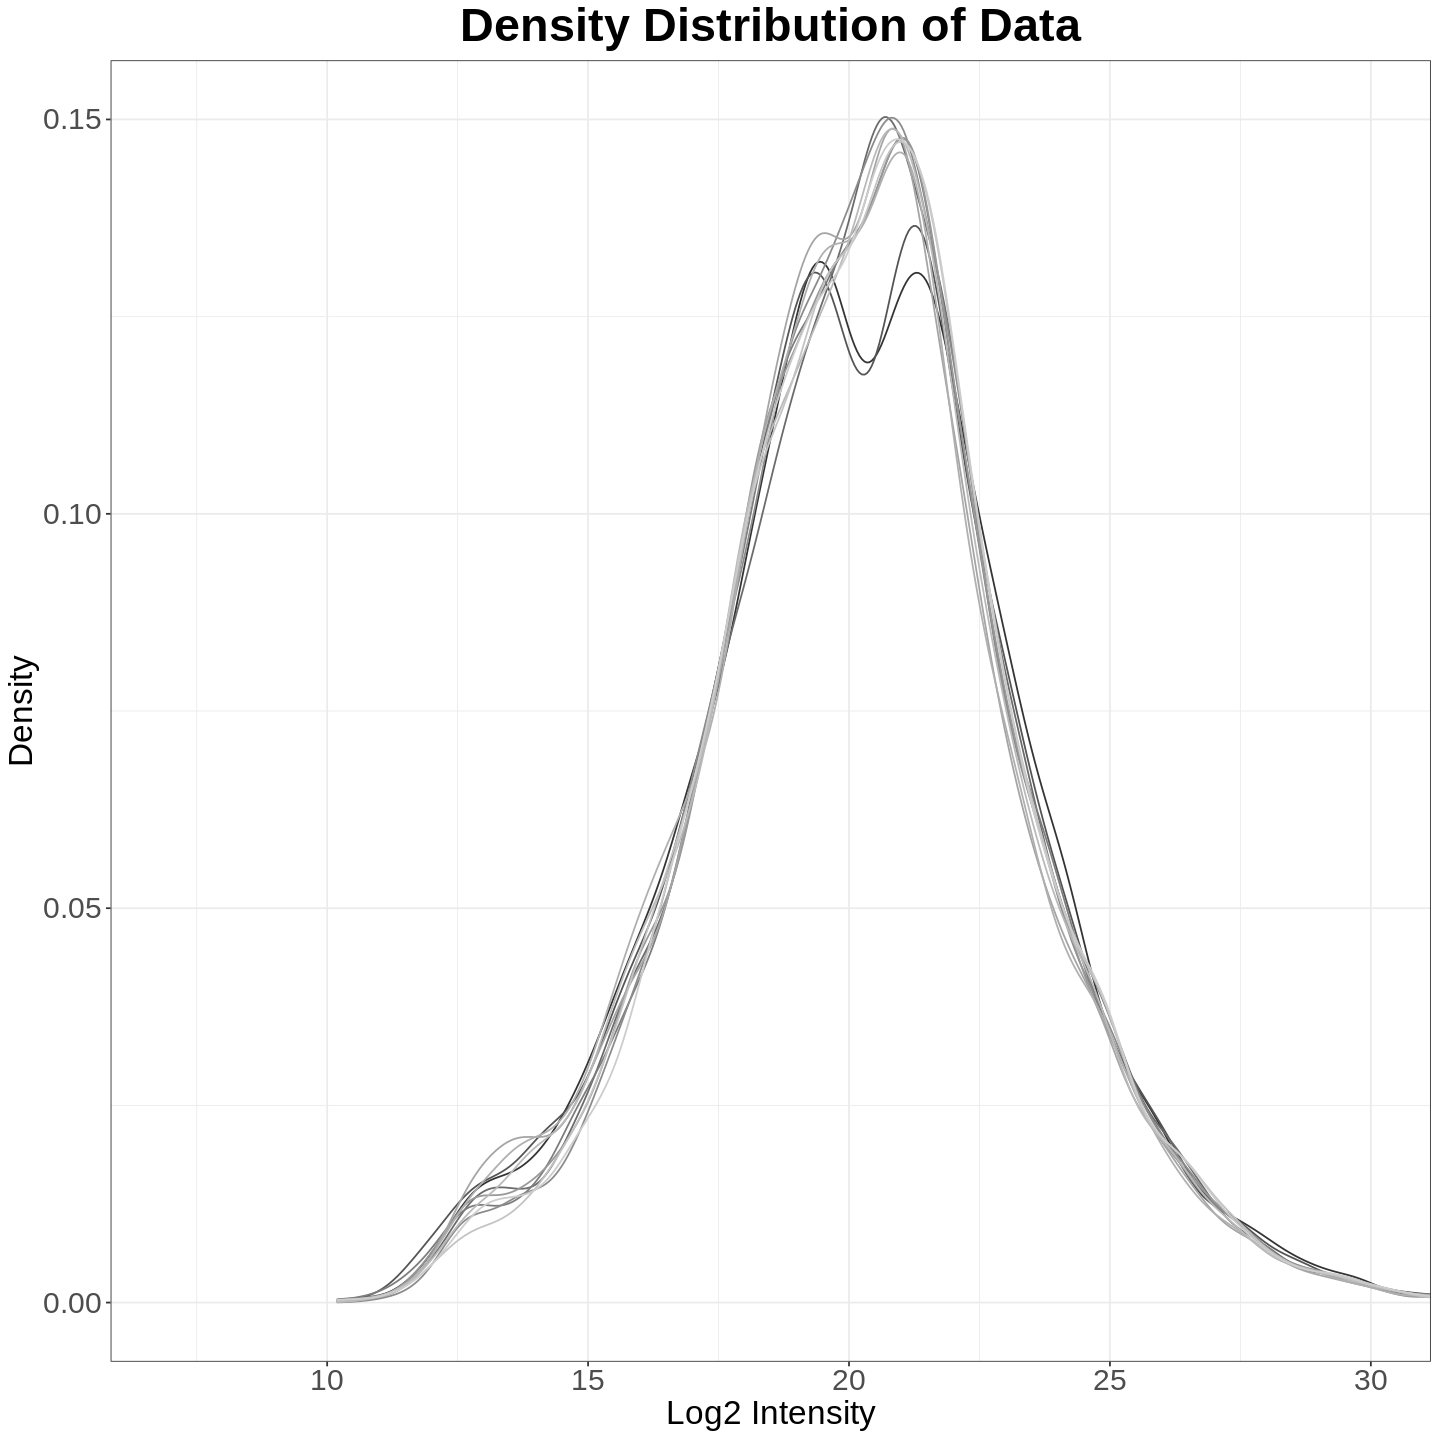

In [17]:
options(repr.plot.width=12, repr.plot.height=12, res=200)
suppressMessages(custom_density_plot(featab_df, 
                                     y_lim_param=0.15))

### Mean TIC ACross Samples 

Input:

- data ; if nas ; willl be imputed for 0s within the function because we need to take into account the missing values in each sample to properly detect low intensity samples 
- optional ; metadata ; if present will factor color it ; if not then will not 


Note ; if x-axis need be changed for fontsize ; use   axis.title.x = element_text( size=16) in plotMeanTic function to control;

In [18]:
meta_df

Sample.Type File.Name       Sample.ID             Sample_ID_upd  
6  Unknown     MT_20230308_006 pooledsample_02       pooled_1       
7  Unknown     MT_20230308_008 Naive_250k_01_02      Tn_250K_1      
8  Unknown     MT_20230308_010 Naive_250k_02_02      Tn_250K_2      
11 Unknown     MT_20230308_016 CD8T_stem_250k_01_02  CD8stem_250K_1 
12 Unknown     MT_20230308_018 CD8T_stem_300k_01_02  CD8stem_300K_2 
13 Unknown     MT_20230308_020 pooledsample_04       pooled_2       
14 Unknown     MT_20230308_022 CD8T_trans_350k_01_02 CD8trans_350K_1
15 Unknown     MT_20230308_024 CD8T_trans_250k_01_02 CD8trans_250K_2
16 Unknown     MT_20230308_026 CD8T_TD_750k_01_02    CD8TD_750K_1   
17 Unknown     MT_20230308_028 CD8T_TD_750k_01_02    CD8TD_750K_2   
18 Unknown     MT_20230308_030 pooledsample_06       pooled_3       
   cell_number group    Comment
6  NA          pooled   1      
7  250000      Tn       1      
8  250000      Tn       1      
11 250000      CD8stem  1      
12 300000      CD8stem  1      
13 NA          pooled   1      
14 350000      CD8trans 1      
15 250000      CD8trans 1      
16 750000      CD8TD    1      
17 750000      CD8TD    1      
18 NA          pooled   1      
   Path                                                                                          
6  D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
7  D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
8  D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
11 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
12 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
13 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
14 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
15 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
16 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
17 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
18 D:\\IDX_Data\\Maheshwor\\20220213_phosphatidylserine\\20230308_sample_analysis\\HILICpos_RPneg
   Instrument.Method                                                                                   
6  C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
7  C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
8  C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
11 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
12 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
13 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
14 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
15 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
16 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
17 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
18 C:\\Xcalibur\\methods\\MT\\phosphatidylserine_tSIM_method\\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS
   Process.Method Position Inj.Vol
6  NA             G:A4     5      
7  NA             G:B1     5      
8  NA             G:B2     5      
11 NA             G:B5     5      
12 NA             G:B6     5      
13 NA             G:A4     5      
14 NA             G:B7     5      
15 NA             G:B8     5      
16 NA             G:B9     5      
17 NA            

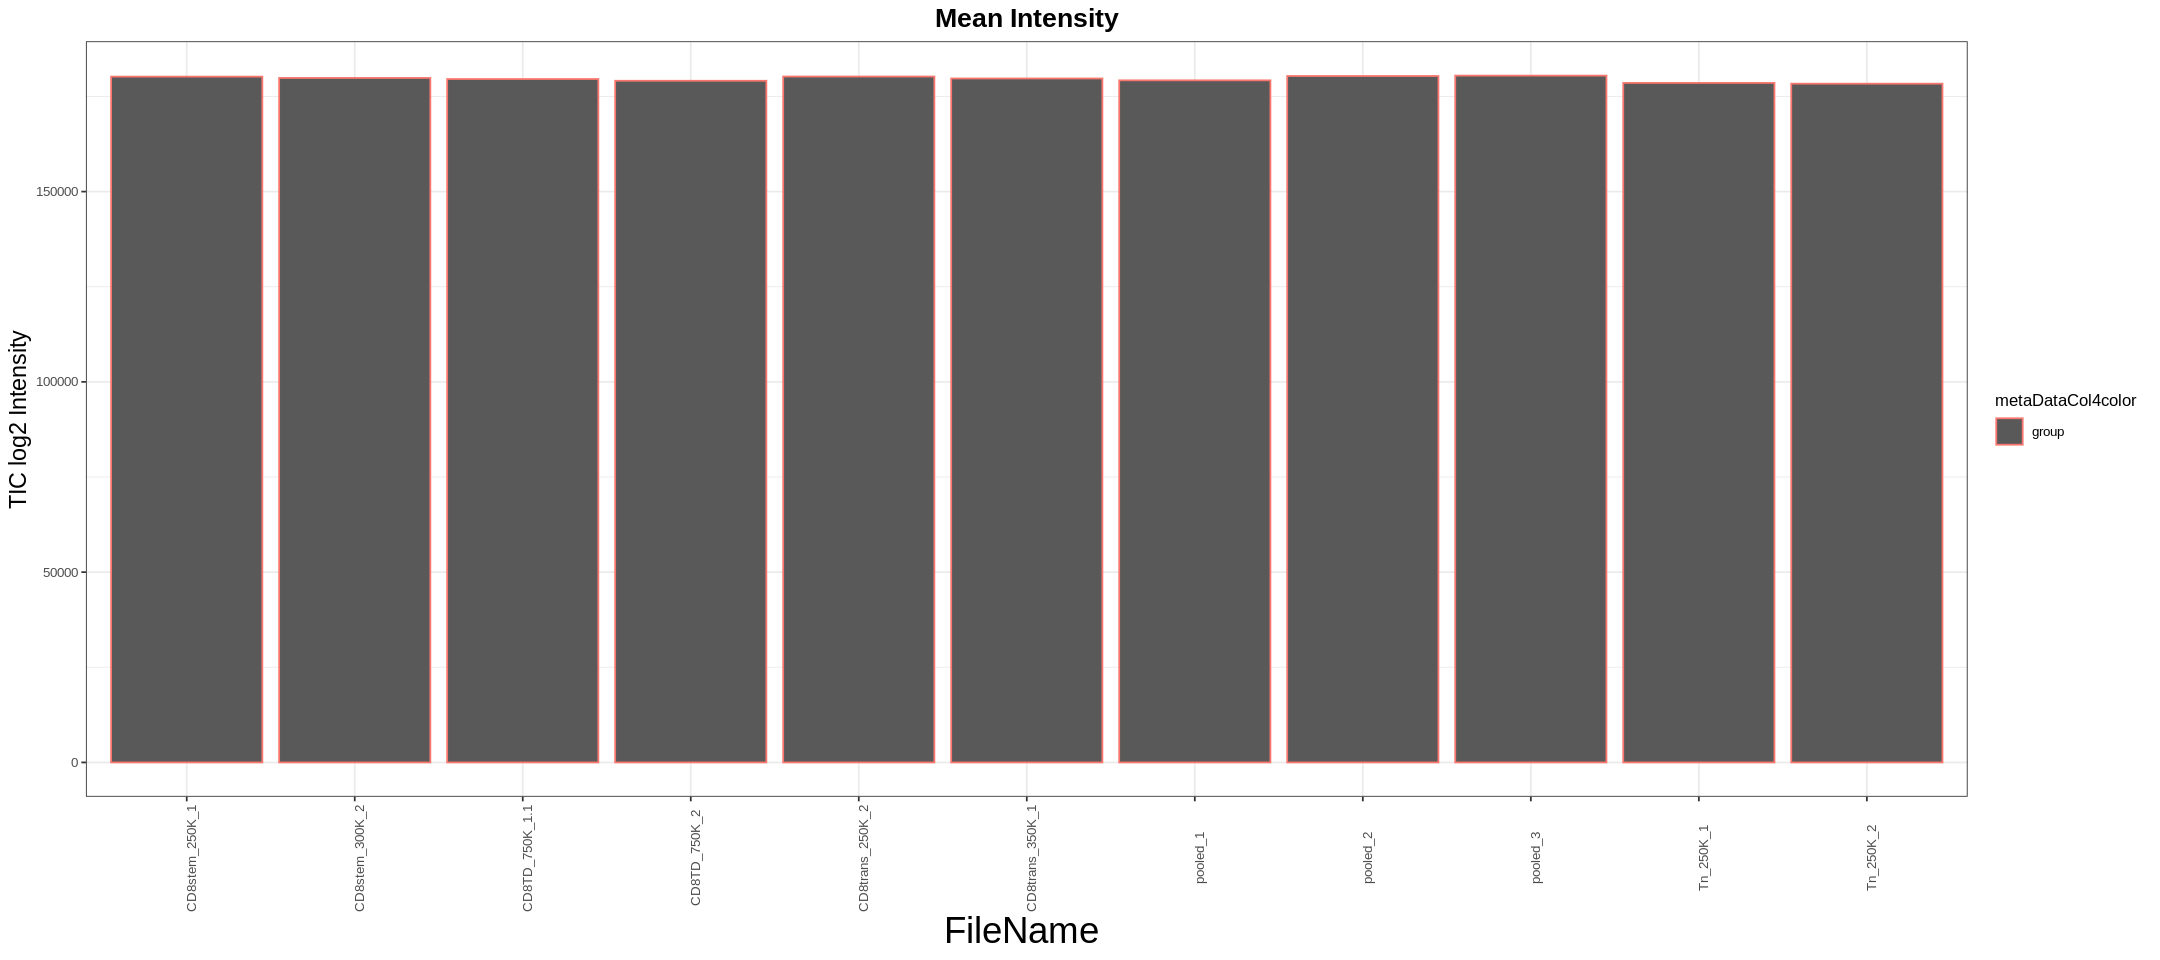

In [19]:
options(repr.plot.width=18, repr.plot.height=8, res=200)
suppressMessages(plotTIC(featab_df,meta_df,"Sample_ID_upd","group"))
#control xaxis font size;axis.title.x = element_text( size=16)

## Decide SD cutoff for outliers by yourself if need be

In [20]:
get_TIC_outliers(featab_df,2)

columnsum Sample.ID

### Missing values plot 

Input:

- logged 2/linear scale  data with nas ; no imputation happening in the function as i am counting Nas 


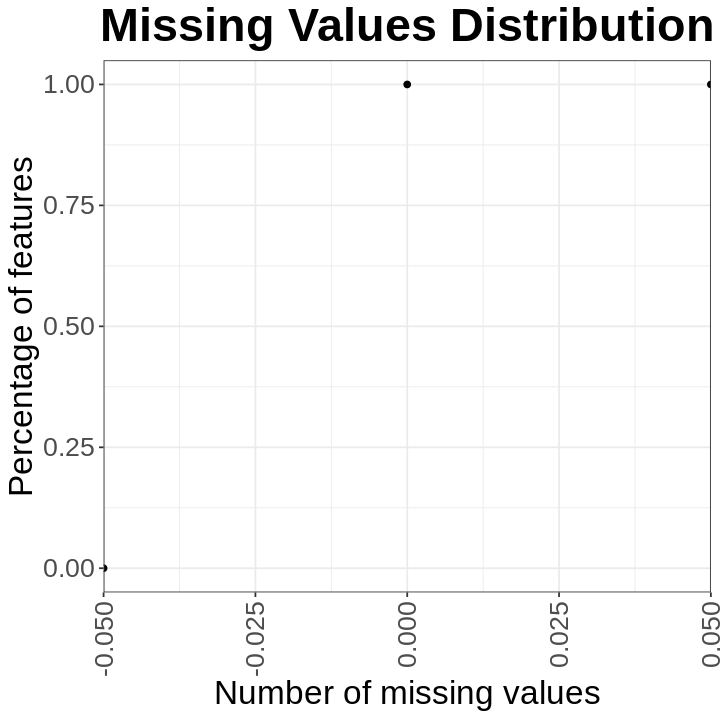

In [21]:
source('./utilis/utlis_MQC.R')
options(repr.plot.width=6, repr.plot.height=6, res=200)
plot_NA_cdf(featab_df, present_percentage = FALSE)

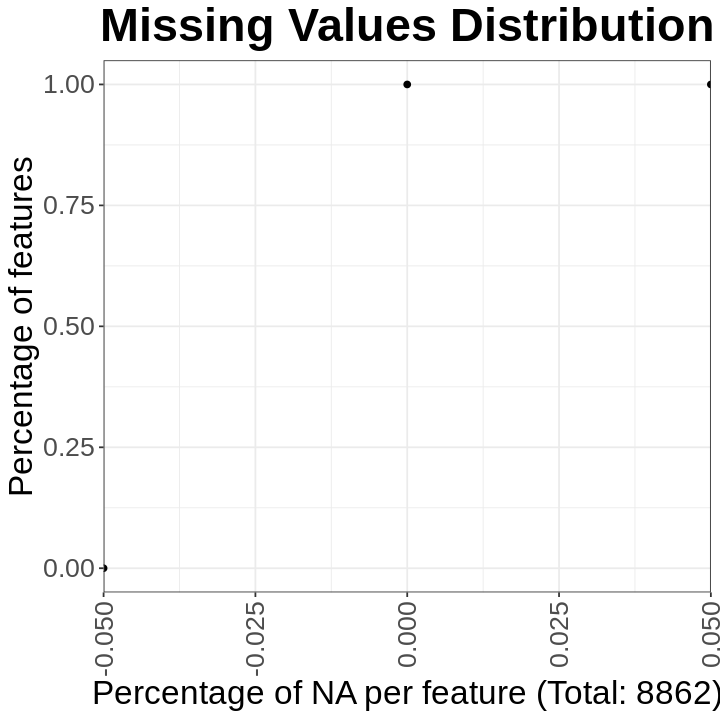

In [22]:
options(repr.plot.width=6, repr.plot.height=6, res=200)
plot_NA_cdf(featab_df, present_percentage = TRUE)

### Corelation bw samples 

In [23]:
# A function that help later step as correlation plot cannot handle very well with zero values
mssingValueAsNA <- TRUE # NA is good to skip this step
if (!mssingValueAsNA) {
    featab_df.NA <- featab_df
    featab_df.NA[featab_df == 0] <- NA  # Turn 0 into NA
    featab_df <- featab_df.NA
}

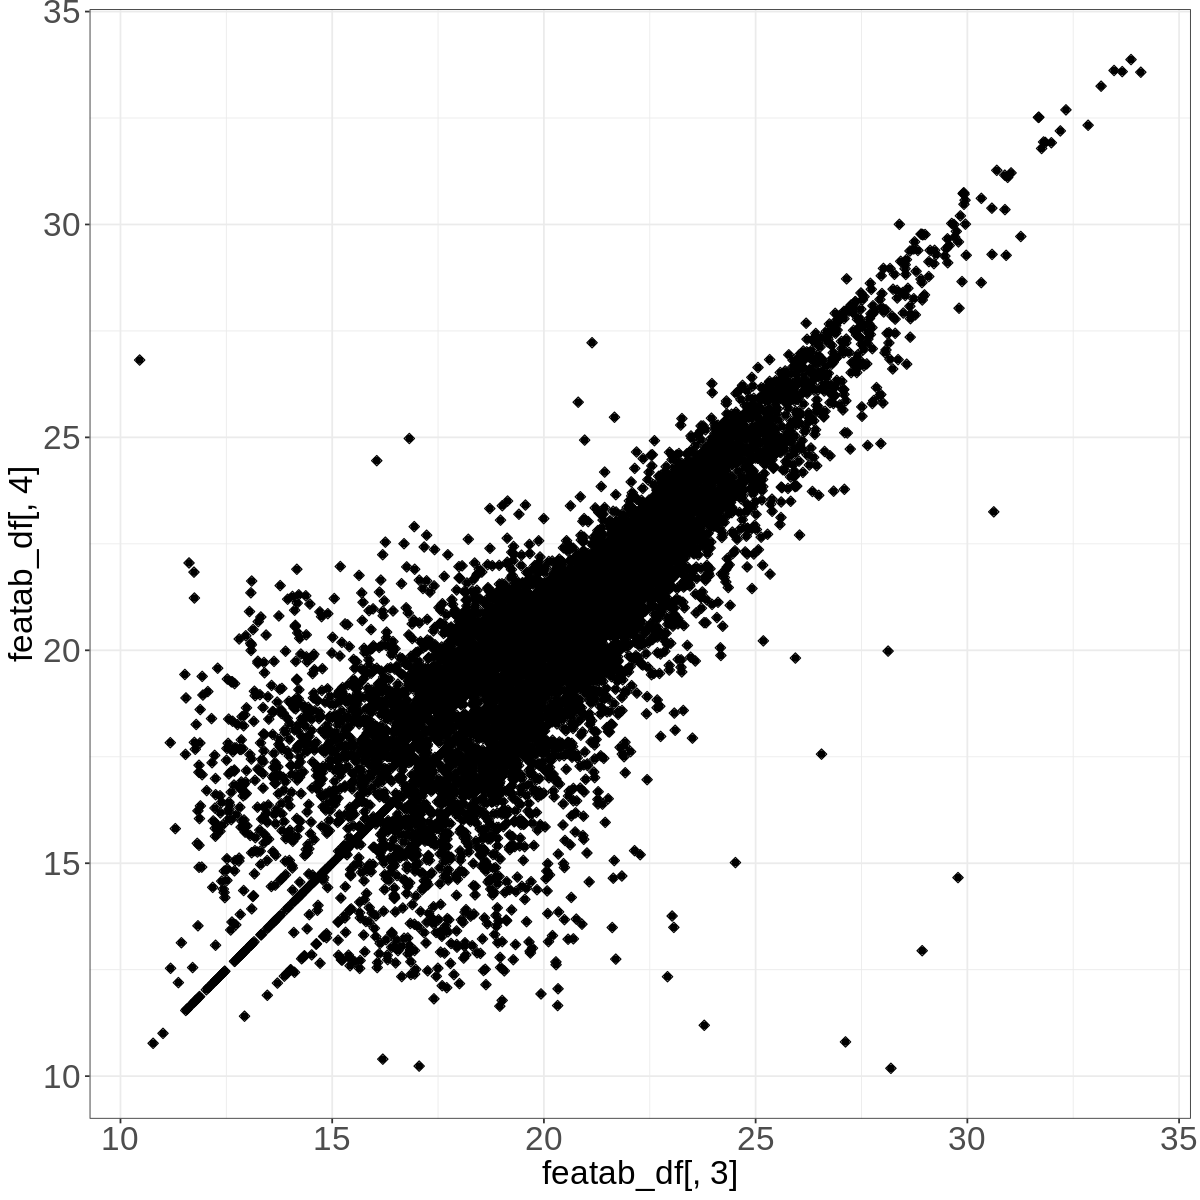

In [24]:
#options(repr.plot.width=16, repr.plot.height=20, res=200)
# reproducibility of injection replicates
#figure options ; change to the needs
options(repr.plot.width=10, repr.plot.height=10)
  ggplot(featab_df, aes(x=featab_df[,3], y=featab_df[,4])) + geom_point()+
  geom_point(size=2, shape=23) +# Change the point size, and shape
  theme_bw()+#axis settings 
    theme(axis.text=element_text(size=20))+
 #axis labels settings 
    theme(axis.title=element_text(size=20))

## Heatmap 

Input: 
- data; log2/linear scale data with nas 
- metadata is optional 
- metadata include what to colors.

WishList Note:  fix if metadata is not passed; debug

In [25]:
colnames(meta_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"

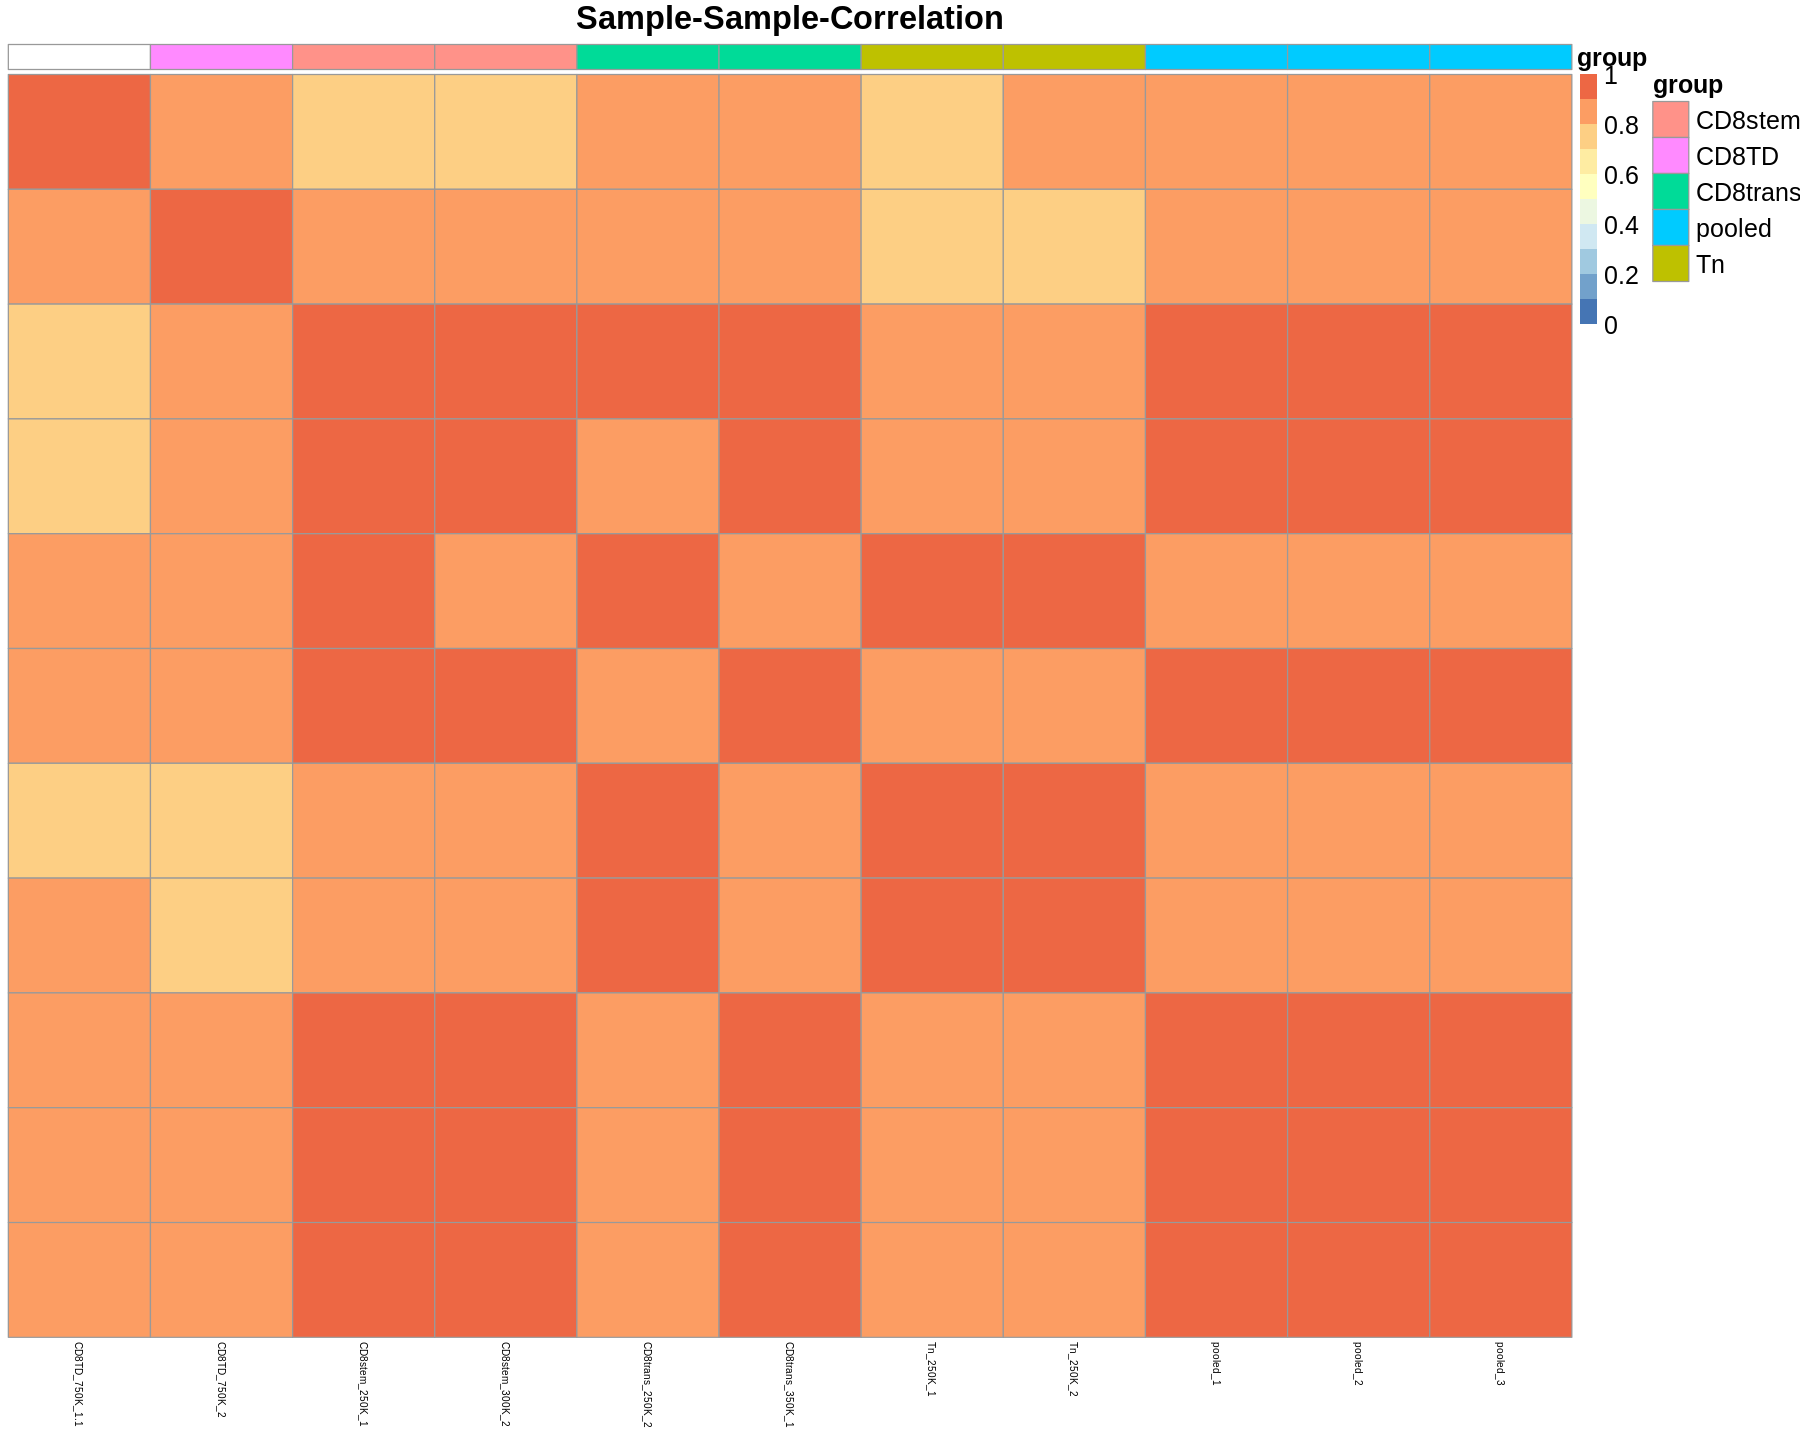

In [26]:
options(repr.plot.width=15, repr.plot.height=12, res=300)
suppressMessages(plot_heatmap(featab_df, meta_df, "Sample_ID_upd","group"))

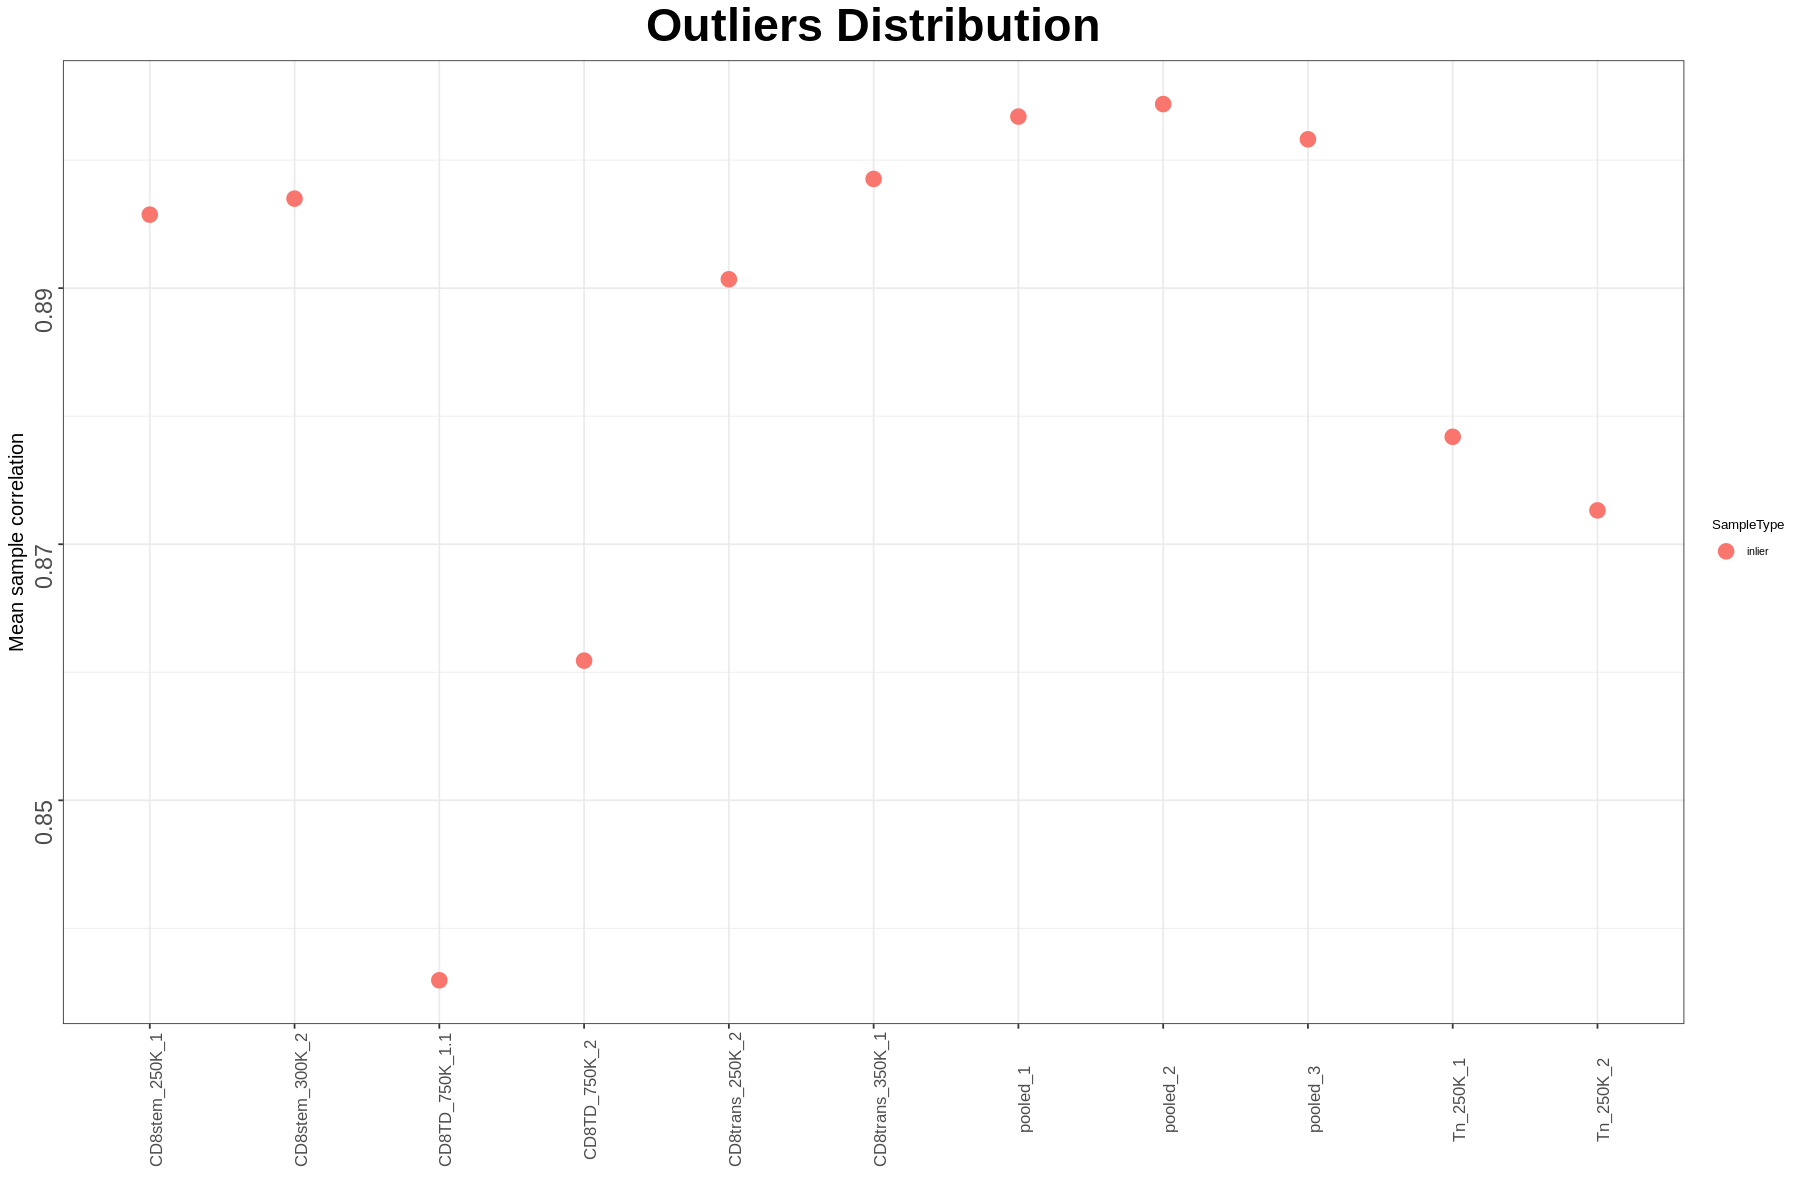

In [27]:
df.outliers <-  get_outliers_heatmap(featab_df)
options(repr.plot.width=15, repr.plot.height=10, res=300)
getoutliersplot(df.outliers)

In [28]:
filtered.df.outliers<-df.outliers %>% filter(SampleType=="outlier")
filtered.df.outliers

samples columnmeancor SampleType

------------

-----